In [1]:
import spectral.io.envi as envi
import spectral

import matplotlib.pyplot as plt
import numpy as np

In [127]:
file = r"E:\Breast_Cancer_US_dataset\br1003-br2085b\br1003-br2085b"
header = r"E:\Breast_Cancer_US_dataset\br1003-br2085b\br1003-br2085b.hdr"

img = envi.open(header, file)

In [13]:
img.read_band(300)[:,3200:].shape

(3400, 3600)

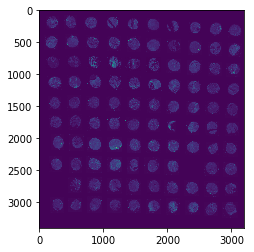

In [14]:
plt.imshow(img.read_band(300)[:,:3200], cmap = "viridis")

In [15]:
L = img.read_band(350)#[1000:2600, 1000:2700]

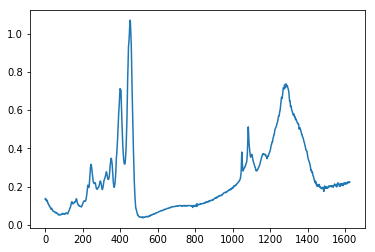

In [133]:
plt.plot(img.read_pixel(2100,900))

In [129]:
dir(img)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_disable_memmap',
 '_fix_negative_indices',
 '_memmap',
 '_open_memmap',
 'asarray',
 'bands',
 'byte_order',
 'dtype',
 'fid',
 'filename',
 'interleave',
 'load',
 'metadata',
 'nbands',
 'ncols',
 'nrows',
 'offset',
 'open_memmap',
 'params',
 'read_band',
 'read_bands',
 'read_datum',
 'read_pixel',
 'read_subimage',
 'read_subregion',
 'sample_size',
 'scale_factor',
 'set_params',
 'shape',
 'swap',
 'transform',
 'using_memmap']

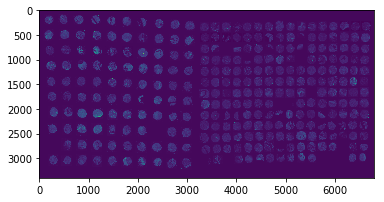

In [16]:
plt.imshow(L)

In [7]:
from skimage.filters import sobel

C:\Users\Conor\Anaconda3\lib\site-packages\skimage\__init__.py:80: ResourceWarning: unclosed file <_io.TextIOWrapper name='C:\\Users\\Conor\\Anaconda3\\lib\\site-packages\\pytest.py' mode='r' encoding='utf-8'>
  imp.find_module('pytest')
C:\Users\Conor\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


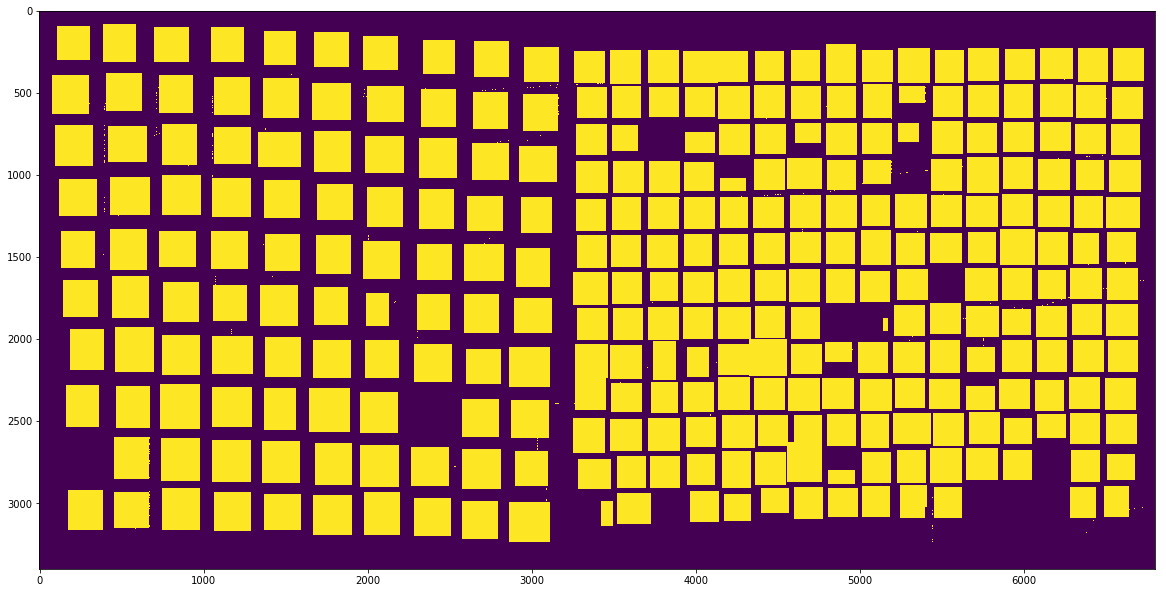

In [60]:
from skimage.data import page
from skimage.filters import (threshold_otsu, threshold_niblack,
                             threshold_sauvola)

image = L
binary_global = image > threshold_otsu(image)

window_size = 3
thresh_niblack = threshold_niblack(image, window_size=window_size, k=5)

binary_niblack = image > thresh_niblack

fig,ax = plt.subplots(figsize = (20,20))
ax.imshow(binary_niblack)

plt.show()

(array([7.125e+03, 1.200e+01, 2.000e+00, 3.000e+00, 0.000e+00, 4.000e+00,
        2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 4.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 4.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 5.000e+00, 3.000e+00, 3.000e+00, 1.000e+00,
        1.000e+00, 3.000e+00, 4.000e+00, 8.000e+00, 4.000e+00, 6.000e+00,
        2.000e+00, 7.000e+00, 9.000e+00, 1.000e+01, 1.300e+01, 9.000e+00,
        9.000e+00, 1.900e+01, 1.700e+01, 1.800e+01, 2.300e+01, 1.400e+01,
        1.300e+01, 8.000e+00, 1.600e+01, 5.000e+00, 7.000e+00, 9.000e+00,
        4.000e+00, 6.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

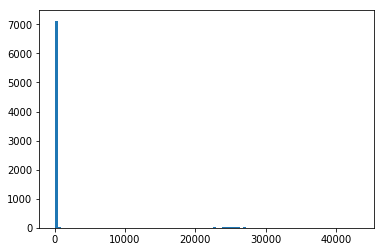

In [72]:
plt.hist([region.area for region in regionprops(label_image)], bins = 100)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


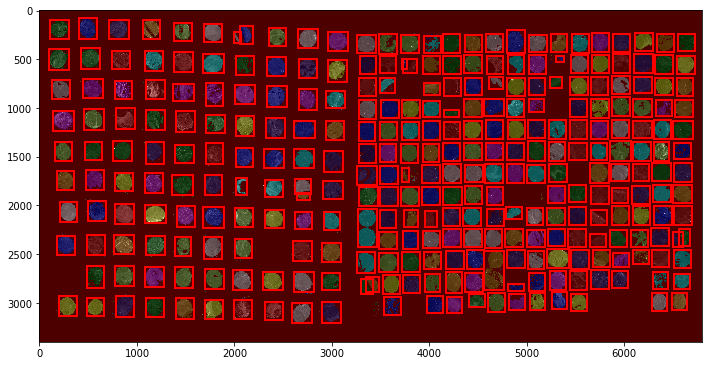

In [135]:
from skimage.filters import threshold_otsu, threshold_triangle, threshold_mean
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import matplotlib.patches as mpatches


image = L#[0:500, 1000:1500]
# apply threshold
thresh = threshold_mean(image)
bw = closing(image > thresh, square(9))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 1000:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        
plt.tight_layout()
plt.show()

In [123]:
import imageio

dir(imageio)

['RETURN_BYTES',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'core',
 'formats',
 'get_reader',
 'get_writer',
 'help',
 'imread',
 'imsave',
 'imwrite',
 'mimread',
 'mimsave',
 'mimwrite',
 'mvolread',
 'mvolsave',
 'mvolwrite',
 'plugins',
 'read',
 'save',
 'show_formats',
 'volread',
 'volsave',
 'volwrite']

In [125]:
imageio.imread(r"E:\Breast_Cancer_US_dataset\br1003-br2085b\br1003-br2085b.TIF")

IndexError: Index out of range while reading from tiff file

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


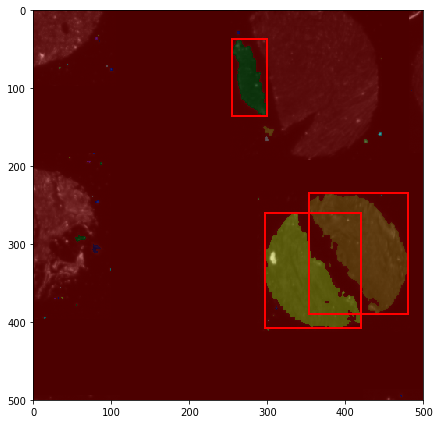

In [118]:
from skimage.filters import threshold_otsu, threshold_triangle
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import matplotlib.patches as mpatches


image = L[2500:3000, 3000:3500]
# apply threshold
thresh = threshold_otsu(image)
bw = closing(image > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 1000:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        
plt.tight_layout()
plt.show()

In [94]:
np.array(regionprops(label_image)[0].bbox)

array([ 81, 414, 288, 581])

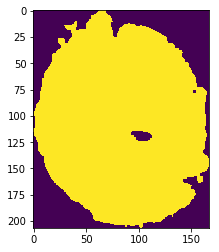

In [79]:
plt.imshow(regionprops(label_image)[0].image)

In [101]:
np.array(regionprops(label_image)[0].bbox) - np.array(regionprops(label_image)[1].bbox)

array([ -1, -90, 205,  76])

In [ ]:
indices = [regionprops(label_image)[0].bbox]

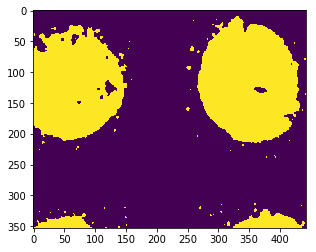

In [98]:
plt.imshow(bw[index[0]-10:index[1]+10,index[2]-140:index[3]+10])

In [95]:
index = np.array(regionprops(label_image)[0].bbox)

In [91]:
index

array([ 91, 424, 298, 591])

In [75]:
dir(regionprops(label_image)[0])

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_cache_active',
 '_intensity_image',
 '_intensity_image_double',
 '_label_image',
 '_ndim',
 '_slice',
 '_transpose_moments',
 '_use_xy_warning',
 'area',
 'bbox',
 'bbox_area',
 'centroid',
 'convex_area',
 'convex_image',
 'coords',
 'eccentricity',
 'equivalent_diameter',
 'euler_number',
 'extent',
 'filled_area',
 'filled_image',
 'image',
 'inertia_tensor',
 'inertia_tensor_eigvals',
 'intensity_image',
 'label',
 'local_centroid',
 'major_axis_length',
 'max_intensity',
 'mean_intensity',
 'min_intensity',
 'minor_axis_length',
 'moments',
 'moments_central',
 'moments_hu',


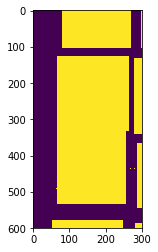

In [61]:
plt.imshow(binary_niblack[1900:2500,3200:3500])

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


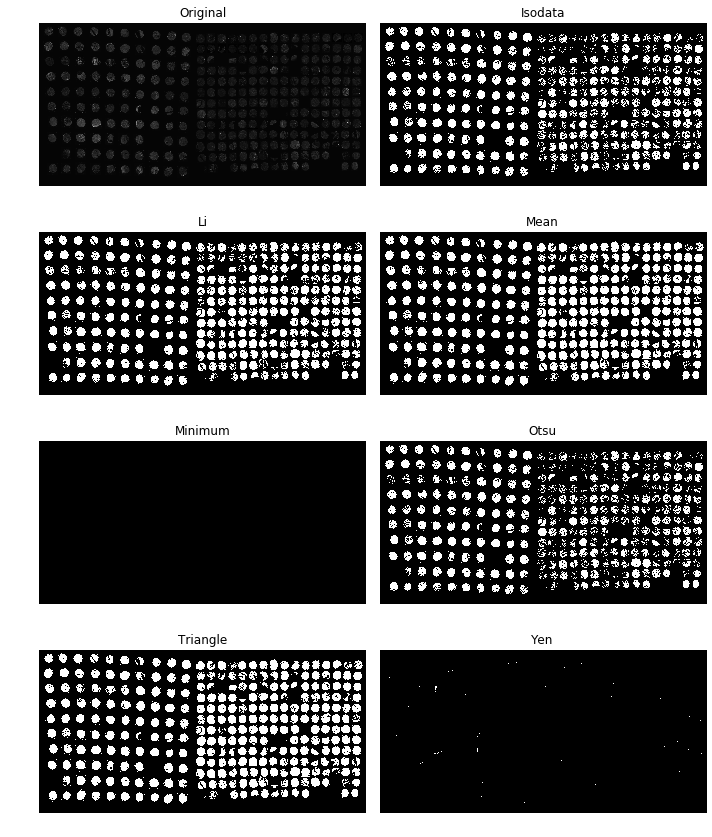

In [20]:
from skimage.filters import try_all_threshold

img = L

# Here, we specify a radius for local thresholding algorithms.
# If it is not specified, only global algorithms are called.
fig, ax = try_all_threshold(img, figsize=(10, 12), verbose=True)
plt.show()

In [100]:
sub = img.read_subimage([0,0],[100,100])

C:\Users\Conor\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  """Entry point for launching an IPython kernel.


In [102]:
sub.shape

(2, 2, 1626)

In [81]:
dir(img)

['__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_disable_memmap',
 '_fix_negative_indices',
 '_memmap',
 '_open_memmap',
 'asarray',
 'bands',
 'byte_order',
 'dtype',
 'fid',
 'filename',
 'interleave',
 'load',
 'metadata',
 'nbands',
 'ncols',
 'nrows',
 'offset',
 'open_memmap',
 'params',
 'read_band',
 'read_bands',
 'read_datum',
 'read_pixel',
 'read_subimage',
 'read_subregion',
 'sample_size',
 'scale_factor',
 'set_params',
 'shape',
 'swap',
 'transform',
 'using_memmap']

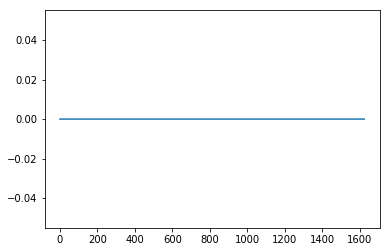

In [78]:
plt.plot(img.read_pixel(2300,2500))

C:\Users\Conor\Anaconda3\lib\site-packages\spectral\graphics\graphics.py:602: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  rgb = source.read_bands(bands).astype(np.float)
C:\Users\Conor\Anaconda3\lib\site-packages\spectral\io\bsqfile.py:165: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  band = np.fromstring(vals.tostring(), dtype=self.dtype)


ImageView object:
  Display bands       :  (29, 19, 9)
  Interpolation       :  <default>
  RGB data limits     :
    R: [-0.18523478507995605, 0.7837232351303101]
    G: [-0.2982504367828369, 0.7897186279296875]
    B: [-0.5072095394134521, 0.8729493618011475]

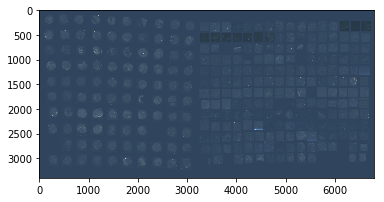

In [74]:
spectral.imshow(img, (29, 19, 9))